# Data exploratory - finalize cleanup of Appartments data

### this notebook is in charge of completing the cleanup of Appartments data, by removing limits then save the final dataset


### 0. Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import modules.file_helper as file_help

### 1. Exploratory Data Analysis

In [3]:
#Work with Appartments, Sells
global_data = pd.read_csv(os.path.join(file_help.DATA_CURATED_FOLDER, 'Appartement'+ file_help.FILE_NAME_OUT_EXT), encoding='utf-8', sep=';', decimal='.')

global_data = global_data[global_data['Nature mutation'] == 'Vente']

# Check the number of data points in the data set
print(f'number of Appartments sold : {len(global_data)}')



number of Appartments sold : 297647


### 2. Cleanup limits

In [4]:
curated_data = global_data.copy(deep=True)

count    297647.000000
mean         51.952588
std          28.530909
min           0.000000
25%          31.000000
50%          47.000000
75%          66.000000
max         861.000000
Name: Surface reelle bati, dtype: float64


Text(0.5, 1.0, 'Surface batie')

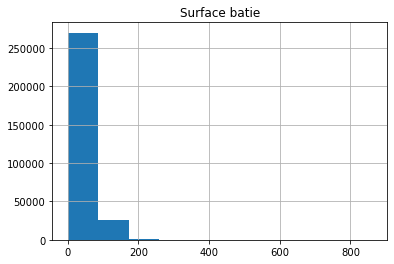

In [5]:
print(global_data['Surface reelle bati'].describe())
global_data['Surface reelle bati'].hist()
plt.title('Surface batie')

Text(0.5, 1.0, 'Surface batie')

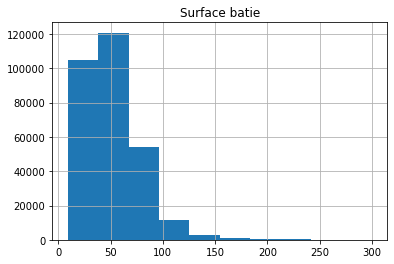

In [6]:
#drop surfaces between 9 and 300
curated_data.drop(curated_data[(curated_data['Surface reelle bati']<9 ) | (curated_data['Surface reelle bati']> 300 )].index, inplace=True)
curated_data['Surface reelle bati'].hist()
plt.title('Surface batie')

count    297647.000000
mean          2.488176
std           1.058197
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          16.000000
Name: Nombre pieces principales, dtype: float64


Text(0.5, 1.0, 'Number of room')

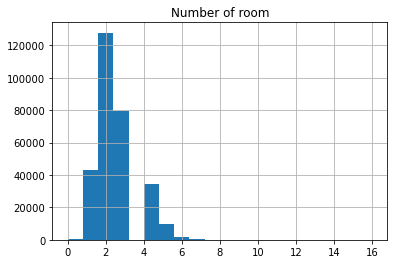

In [7]:
print(global_data['Nombre pieces principales'].describe())
global_data['Nombre pieces principales'].hist(bins=20)
plt.title('Number of room')

Text(0.5, 1.0, 'Number of room')

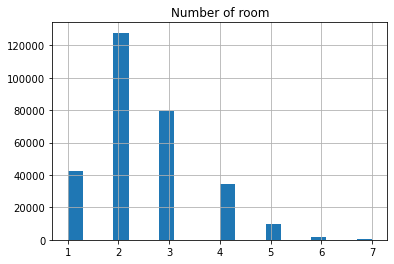

In [8]:
#drop homes with number of rooms > 7
curated_data.drop(curated_data[(curated_data['Nombre pieces principales']> 7 )].index, inplace=True)
curated_data.loc[curated_data['Nombre pieces principales'] == 0] = 1
curated_data['Nombre pieces principales'].hist(bins=20)
plt.title('Number of room')

count    297647.000000
mean        220.287250
std        2035.448614
min           0.000000
25%           0.000000
50%           0.000000
75%          51.000000
max      312300.000000
Name: Surface terrain, dtype: float64


Text(0.5, 1.0, 'Surface terrain')

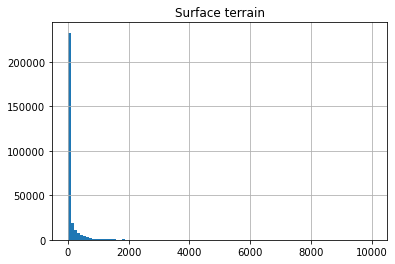

In [9]:
print(global_data['Surface terrain'].describe())
global_data['Surface terrain'].hist(bins=100, range=(0,10000))
plt.title('Surface terrain')

Text(0.5, 1.0, 'Surface terrain')

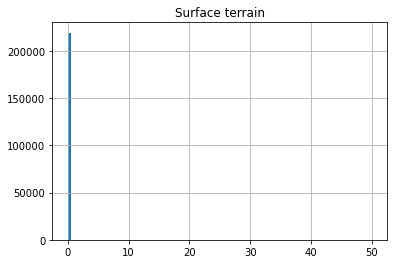

In [10]:
#drop ground surfaces > 50m²
curated_data.drop(curated_data[(curated_data['Surface terrain']> 50 )].index, inplace=True)
curated_data['Surface terrain'].hist(bins=100)
plt.title('Surface terrain')

count    2.976470e+05
mean     1.188472e+06
std      7.936198e+06
min      1.500000e-01
25%      1.000000e+05
50%      1.640000e+05
75%      2.900000e+05
max      2.453659e+08
Name: Valeur fonciere, dtype: float64


Text(0.5, 1.0, 'Valeur fonciere')

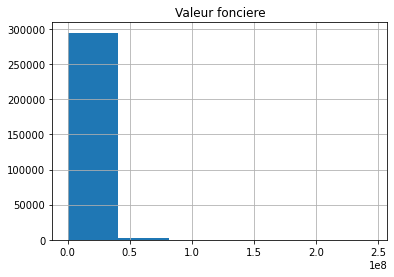

In [11]:
print(global_data['Valeur fonciere'].describe())
global_data['Valeur fonciere'].hist(bins=6)
plt.title('Valeur fonciere')

Text(0.5, 1.0, 'Valeur fonciere')

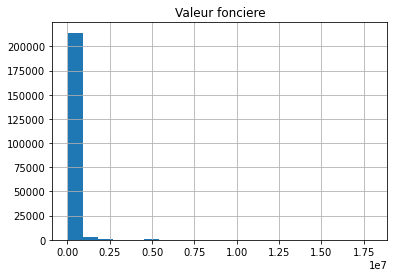

In [12]:
#drop when transaction cost are not between 10k€ and 20m€
curated_data.drop(curated_data[(curated_data['Valeur fonciere']> 20000000 ) | (curated_data['Valeur fonciere'] < 10000)].index, inplace=True)
curated_data['Valeur fonciere'].hist(bins=20)
plt.title('Valeur fonciere')


In [13]:
#store dataset as final dataset 
curated_data.to_csv(os.path.join(file_help.DATA_OUT_FOLDER, 'Appartement' + file_help.FILE_NAME_OUT_EXT), index=False, sep=';')
